In [2]:
# --- CELDA 1: Importar librerías ---
# Importamos pandas para los datos y matplotlib para los gráficos
import pandas as pd
import matplotlib.pyplot as plt

print("Librerías importadas con éxito!")

Librerías importadas con éxito!


In [3]:
# --- CELDA 2: Cargar y preparar los datos ---
archivo_csv = "data_google_ads.csv"
df = pd.read_csv(archivo_csv)

# ¡Limpieza rápida!
# Vamos a enfocarnos solo en las filas donde "Avg. monthly searches" SÍ tiene un dato.
# .dropna() elimina las filas con valores nulos en esa columna.
df_limpio = df.dropna(subset=['Avg. monthly searches'])

print(f"Datos cargados. Pasamos de {len(df)} filas a {len(df_limpio)} filas limpias.")
df_limpio.head()

Datos cargados. Pasamos de 403 filas a 376 filas limpias.


,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0


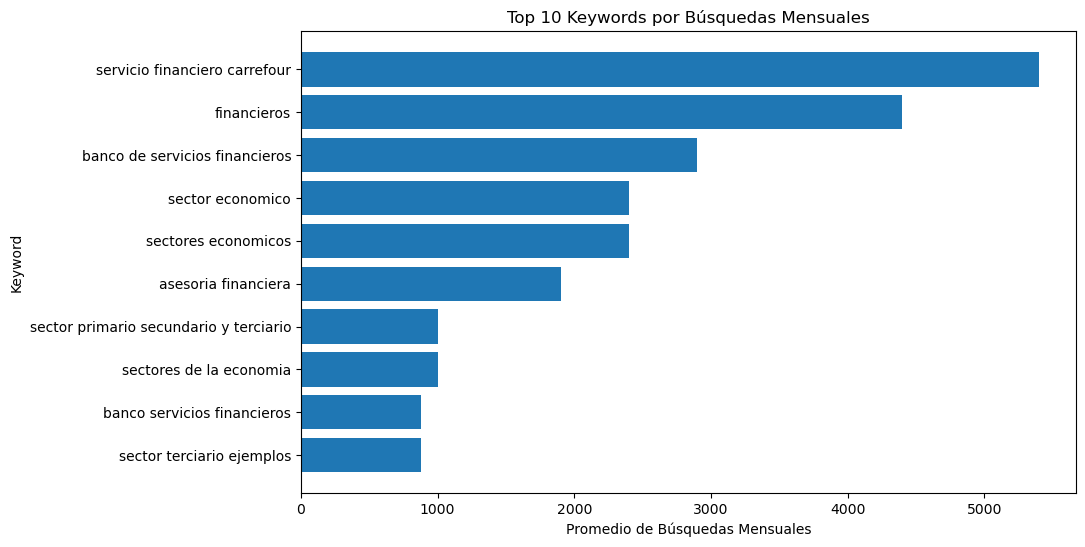

In [4]:
# --- CELDA 3: ¡Tu Primer Gráfico! (Top 10 Keywords) ---

# 1. Obtenemos el Top 10 (como antes)
df_top_10 = df_limpio.sort_values(by="Avg. monthly searches", ascending=False).head(10)

# 2. ¡Creamos el gráfico!
plt.figure(figsize=(10, 6)) # Define el tamaño del lienzo (ancho, alto)

# Creamos un gráfico de barras horizontal (barh)
# 'y' (eje vertical) son las Keywords
# 'width' (ancho de la barra) son las Búsquedas
plt.barh(df_top_10['Keyword'], df_top_10['Avg. monthly searches'])

plt.title('Top 10 Keywords por Búsquedas Mensuales') # Título
plt.xlabel('Promedio de Búsquedas Mensuales') # Etiqueta Eje X
plt.ylabel('Keyword') # Etiqueta Eje Y

plt.gca().invert_yaxis() # Invierte el eje Y para que la #1 esté arriba
plt.show() # Muestra el gráfico

In [5]:
# --- CELDA 4: Limpieza de Datos ---
# Vamos a limpiar las columnas de 'cambio'

# Copiamos para no modificar el original, es una buena práctica
df_limpio = df.dropna(subset=['Avg. monthly searches']).copy()

# Inspeccionamos un valor de 'YoY change' para ver cómo es
print(f"Valor original de YoY change: {df_limpio['YoY change'].iloc[0]}")

# 1. Quitamos el símbolo '%'
df_limpio['YoY change'] = df_limpio['YoY change'].str.replace('%', '')
df_limpio['Three month change'] = df_limpio['Three month change'].str.replace('%', '')

# 2. Convertimos la columna a número (float)
# errors='coerce' es un truco genial: si encuentra un valor que NO puede convertir, lo transforma en Nulo (NaN) en lugar de dar un error.
df_limpio['YoY change'] = pd.to_numeric(df_limpio['YoY change'], errors='coerce')
df_limpio['Three month change'] = pd.to_numeric(df_limpio['Three month change'], errors='coerce')

print("\n¡Columnas limpiadas! Verificamos los nuevos tipos de datos:")
df_limpio.info()

Valor original de YoY change: 0%

¡Columnas limpiadas! Verificamos los nuevos tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 0 to 402
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       376 non-null    object 
 1   Currency                      376 non-null    object 
 2   Avg. monthly searches         376 non-null    float64
 3   Three month change            350 non-null    float64
 4   YoY change                    346 non-null    float64
 5   Competition                   376 non-null    object 
 6   Competition (indexed value)   240 non-null    float64
 7   Top of page bid (low range)   110 non-null    float64
 8   Top of page bid (high range)  110 non-null    float64
 9   Ad impression share           0 non-null      float64
 10  Organic impression share      0 non-null      float64
 11  Organic average position      0 no

In [6]:
# --- CELDA 5: Análisis Agrupado ---

# Agrupamos el DataFrame por la columna "Competition"
# Luego, seleccionamos las columnas que nos interesan y calculamos la media (.mean())
df_agrupado = df_limpio.groupby('Competition')[['Avg. monthly searches', 'YoY change']].mean()

print("--- Promedios por Nivel de Competencia ---")
print(df_agrupado)

--- Promedios por Nivel de Competencia ---
             Avg. monthly searches  YoY change
Competition                                   
High                     16.521739   12.388889
Low                     186.289308   11.225352
Medium                  199.137931   10.560000
Unknown                   7.279412  -30.147059


Creando gráfico de distribución (histograma)...


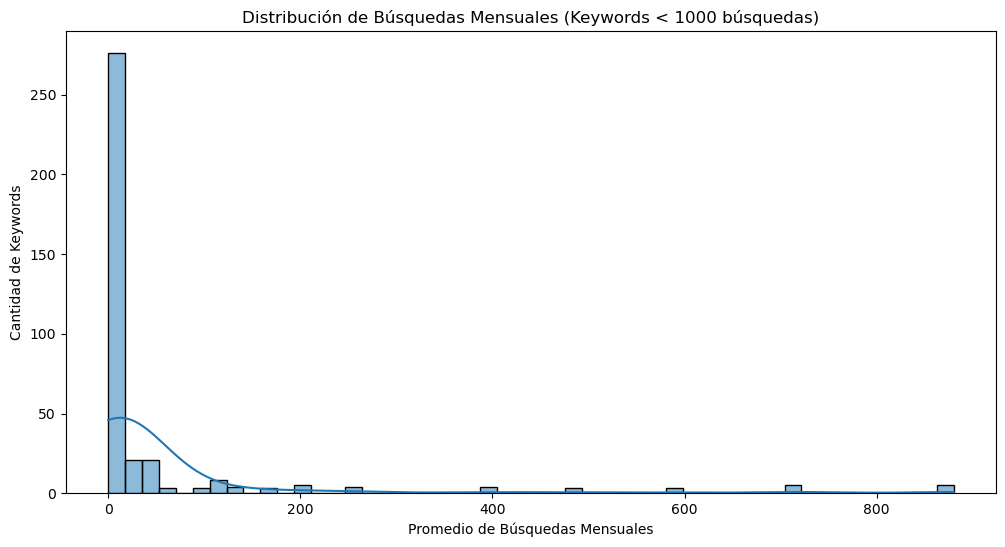

In [7]:
# --- CELDA 6: Visualización con Seaborn ---

# 1. Importamos seaborn con su apodo estándar 'sns'
import seaborn as sns
import matplotlib.pyplot as plt # A menudo seaborn usa matplotlib por debajo

print("Creando gráfico de distribución (histograma)...")

# 2. Creamos el gráfico
# Filtramos para no mostrar keywords con más de 1000 búsquedas, para ver mejor el detalle
df_filtrado = df_limpio[df_limpio['Avg. monthly searches'] < 1000]

plt.figure(figsize=(12, 6)) # Definimos el tamaño

# .histplot() crea un histograma.
# kde=True dibuja una línea suave que estima la forma de la distribución.
sns.histplot(df_filtrado['Avg. monthly searches'], kde=True, bins=50)

plt.title('Distribución de Búsquedas Mensuales (Keywords < 1000 búsquedas)')
plt.xlabel('Promedio de Búsquedas Mensuales')
plt.ylabel('Cantidad de Keywords')
plt.show()

Creando gráfico de dispersión (scatterplot)...


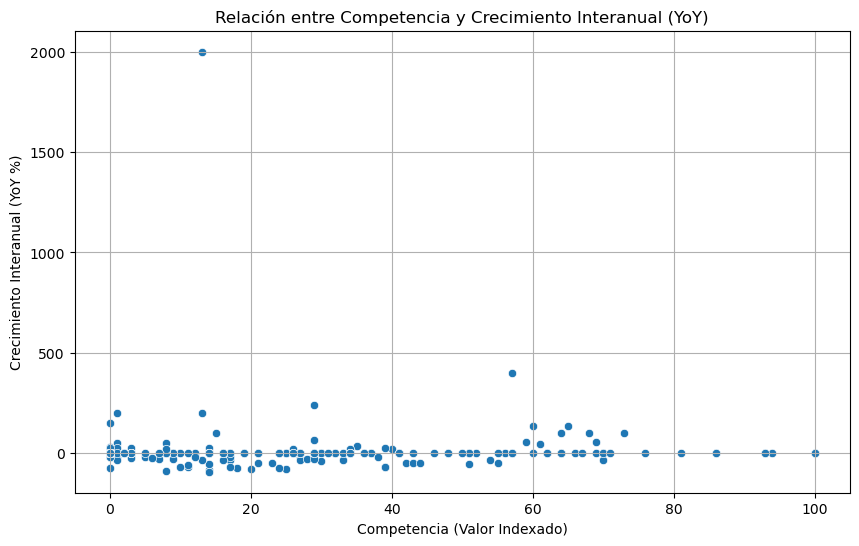

In [8]:
# --- CELDA 7: Análisis Bivariado (Relaciones) ---
# ¿Hay relación entre la competencia y el crecimiento?

print("Creando gráfico de dispersión (scatterplot)...")

plt.figure(figsize=(10, 6))

# Usamos seaborn para crear un 'scatterplot'.
# Ponemos la competencia en el eje X y el crecimiento en el eje Y.
sns.scatterplot(data=df_limpio, x='Competition (indexed value)', y='YoY change')

plt.title('Relación entre Competencia y Crecimiento Interanual (YoY)')
plt.xlabel('Competencia (Valor Indexado)')
plt.ylabel('Crecimiento Interanual (YoY %)')
plt.grid(True) # Añadimos una cuadrícula para que sea más fácil de leer
plt.show()

In [9]:
# --- CELDA 8: Investigando los Outliers ---

# Vamos a encontrar la keyword con el mayor crecimiento 'YoY change'
# Usamos .sort_values() como ya sabes
df_mayor_crecimiento = df_limpio.sort_values(by="YoY change", ascending=False)

print("--- La Keyword con el Mayor Crecimiento Interanual ---")
# Imprimimos la primera fila (la que tiene el valor máximo)
# Seleccionamos solo las columnas que nos interesan para ver el contexto
print(df_mayor_crecimiento[['Keyword', 'YoY change', 'Competition', 'Avg. monthly searches']].head(1))

--- La Keyword con el Mayor Crecimiento Interanual ---
              Keyword  YoY change Competition  Avg. monthly searches
26  acceso financiero      2000.0         Low                  110.0
